In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


In [94]:
# Best Dataset combination that produces is protein embeddings + yeastnet + gen expressions
yeast_emb_best = pd.read_csv('../Data/yeast_emb_embeddings_yeastnet_genex.csv', sep = ',', index_col = 0)
yeast_emb_best


,gene_id,gc_5_prime,gc_3_prime,gc_cds,AAA,AAC,AAG,AAT,ACA,ACC,...,data_Turco_expression_11808,data_Turco_expression_16247,data_Turco_expression_16248,data_Turco_expression_16249,data_Turco_expression_16250,data_Turco_expression_16683,data_Turco_expression_16684,data_Turco_expression_16685,data_Turco_expression_21888,data_Turco_expression_21932
0,YAL002W,0.365902,0.310000,0.372057,0.043956,0.019623,0.018053,0.039246,0.013344,0.007849,...,-1.454995,0.120081,0.120937,0.127851,0.128291,-1.802252,-1.220942,-0.876121,0.854368,1.492454
1,YAL003W,0.372881,0.253333,0.448220,0.009709,0.024272,0.077670,0.004854,0.000000,0.019417,...,0.187259,-0.020342,0.049383,-0.085744,-0.124338,0.035694,0.011140,0.071771,-0.280784,0.324166
2,YAL004W,0.417747,0.346667,0.451163,0.023256,0.023256,0.000000,0.046512,0.004651,0.074419,...,0.187259,-0.020342,0.049383,-0.085744,-0.124338,0.035694,0.011140,0.071771,-0.280784,0.324166
3,YAL008W,0.381854,0.296667,0.388889,0.045455,0.020202,0.040404,0.050505,0.015152,0.005051,...,0.200656,0.120081,0.120937,0.127851,0.128291,1.086489,1.085078,2.182672,0.616041,1.037160
4,YAL009W,0.368893,0.323333,0.414414,0.042471,0.011583,0.023166,0.027027,0.011583,0.007722,...,0.203895,0.120081,0.120937,-4.034924,0.128291,0.035502,0.011022,0.071563,0.298273,-0.242586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,YPR195C,0.334995,0.393333,0.467890,0.027523,0.000000,0.000000,0.027523,0.045872,0.009174,...,0.187259,-0.020342,0.049383,-0.085744,-0.124338,0.035694,0.011140,0.071771,-0.280784,0.324166
6575,YPR197C,0.376869,0.276667,0.374332,0.058824,0.021390,0.021390,0.016043,0.042781,0.005348,...,0.187259,-0.020342,0.049383,-0.085744,-0.124338,0.035694,0.011140,0.071771,-0.280784,0.324166
6576,YPR199C,0.329013,0.283333,0.391156,0.030612,0.020408,0.047619,0.047619,0.027211,0.003401,...,-0.006454,0.120081,0.120937,0.127851,0.128291,1.170261,0.623874,0.551316,-0.699168,-0.390249
6577,YPR200C,0.366899,0.313333,0.376923,0.038462,0.015385,0.038462,0.023077,0.030769,0.015385,...,0.291845,0.120081,0.120937,0.127851,0.128291,0.625506,0.162670,0.755235,-1.114033,-0.734796


0.8984865779319241


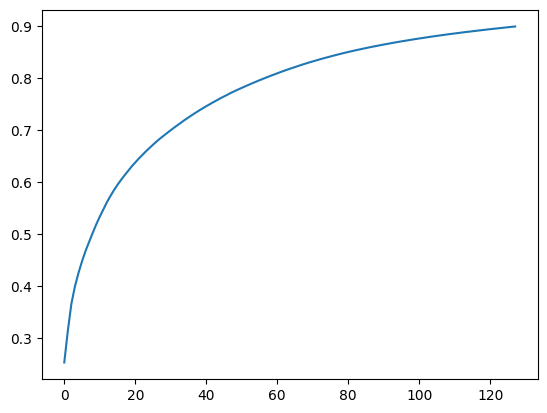

In [95]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=128
pca = PCA(n_components=N)
pca.fit_transform(yeast_emb_best.iloc[:,1:])
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

we retain around 90 % variance of the data

In [96]:
dims = 128
emb_best_pca = pd.DataFrame(PCA(n_components=dims).fit_transform(yeast_emb_best.iloc[:,1:]), index=yeast_emb_best.gene_id).reset_index()
emb_best_pca

,gene_id,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,YAL002W,1.089317,-3.011852,3.407517,-1.659293,0.086628,-0.591660,0.638391,0.288943,-2.140733,...,0.010019,-0.320492,-0.037363,-0.745031,0.183945,0.138022,0.630902,-0.454892,0.278981,-0.208285
1,YAL003W,8.899154,3.204977,-6.893635,-6.380903,-1.007415,2.557472,1.371918,0.612207,-1.071300,...,-0.214352,-0.172831,-0.488131,-0.312136,-0.626822,-0.340904,-0.326965,-0.342080,-0.114764,-0.439197
2,YAL004W,-8.718575,4.936183,0.577745,1.291669,1.875184,3.353667,-2.011013,-1.438096,0.111260,...,-1.419887,-1.870258,0.313514,-0.023898,-0.277667,-0.425514,-0.101957,0.543672,-1.687335,-0.002522
3,YAL008W,1.019033,-3.641889,4.323164,-5.738738,-2.624162,-0.870438,-0.721395,-0.548745,-0.741677,...,0.392312,-0.203364,-0.323726,-0.659804,-0.129572,0.487037,0.125051,0.224696,-0.247865,-0.028226
4,YAL009W,0.203211,-3.413058,-0.606505,0.741641,-4.085337,1.732034,2.617916,-1.501055,-0.651774,...,-0.131919,0.418149,0.156791,-0.199370,0.125424,0.178544,0.164614,-0.282845,0.379569,-0.160700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,YPR195C,-12.833093,3.235372,-0.231510,-0.526165,-1.430143,-1.596875,1.093374,2.160359,0.502568,...,-0.350937,-1.282745,-0.093069,-0.135244,-0.209164,0.028731,-0.112204,0.428499,-0.377713,-0.175652
6575,YPR197C,-10.538519,8.001325,0.811370,2.577134,1.460791,5.534684,-3.539705,-4.089107,-0.134690,...,-0.322793,-1.726631,-0.890664,0.516789,-0.315358,0.199271,0.776412,0.057706,-0.175965,0.023176
6576,YPR199C,-4.447035,-3.500898,1.487133,-0.135930,2.250918,-1.010256,0.807654,-0.606445,0.611886,...,0.421000,0.354647,-0.090067,-0.127371,-0.412098,-0.712685,0.192964,0.138905,0.605944,-0.024877
6577,YPR200C,4.576115,-0.265081,2.466689,-1.803889,-0.699313,-3.362161,-2.044214,0.124364,-1.425217,...,-0.002676,-0.390107,0.706143,-0.139759,0.349411,-0.686176,-0.051298,-0.398468,0.072337,-0.161658


# Simple evaluation on single mutant fitness data

In [97]:
# Read in single mutant fitness data from Constanzo et al. 2016
smf_filter = pd.read_csv('../Data/smf.csv', index_col = 0)

<Axes: >

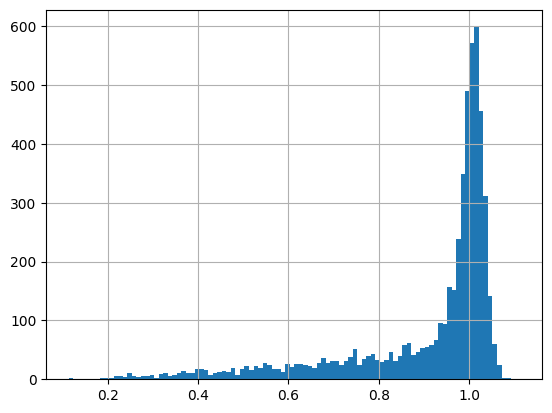

In [98]:
smf_filter.smf_30.hist(bins=100)

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

R2:  0.30270639249540043
RMSE: 0.1524263209128554


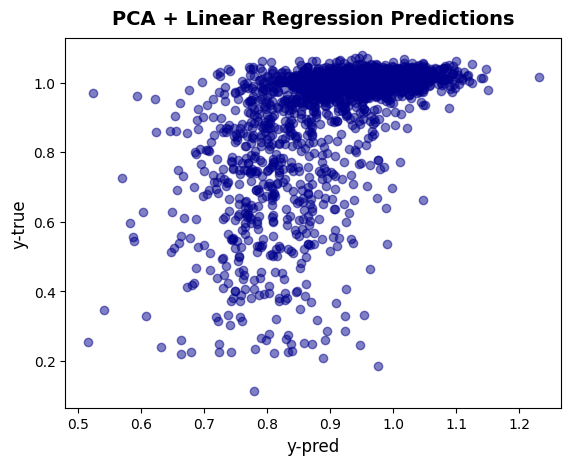

In [100]:
# How predictive are gene embeddings with PCA + Linear Regression

A = smf_filter.merge(emb_best_pca, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("PCA + Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

R2:  0.06702105271237235
RMSE: 0.17250448804739613


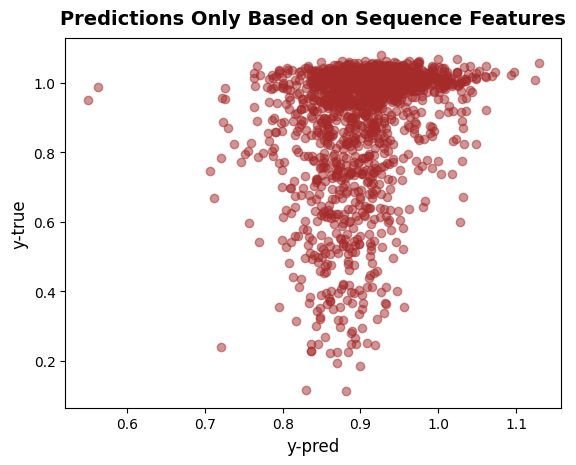

In [101]:
# Comparison to only sequence features 
seq_feats = pd.read_csv('../Data/seq_feats.csv', sep = ',', index_col = 0)
A = smf_filter.merge(seq_feats, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=43)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='brown')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Predictions Only Based on Sequence Features", fontweight='bold', fontsize=14, pad=10)
plt.show()

R2:  0.29313792981754405
RMSE: 0.15300554701125835


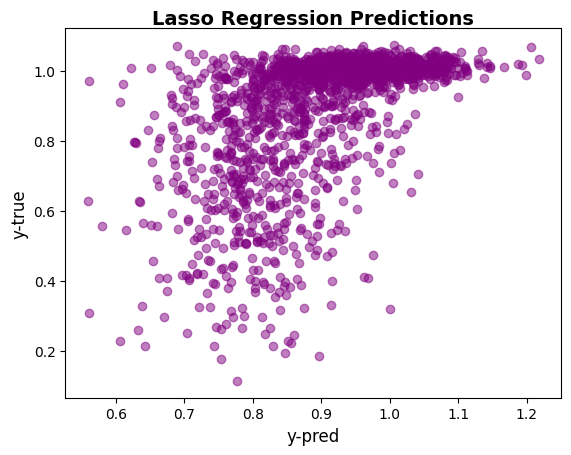

In [124]:
# use Lasso Regression (L1 Regularization) instead of PCA
A = smf_filter.merge(yeast_emb_best, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44)

lasso = Lasso(alpha=0.0004)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)


print('R2: ', lasso.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='purple')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Lasso Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

R2:  0.31955569297158515
RMSE: 0.15445292918062614


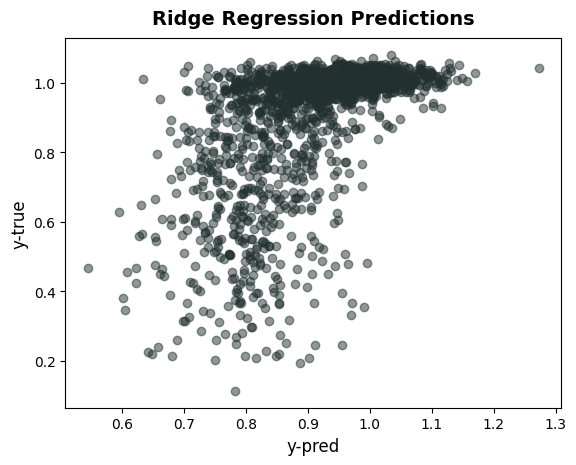

In [133]:
# use Ridge Regression (L2 Regularization) instead of PCA
A = smf_filter.merge(yeast_emb_best, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

ridge = Ridge(alpha=200.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print('R2: ', ridge.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='#223030')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Ridge Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

R2: 0.48637048558856755
RMSE: 0.133422635052736


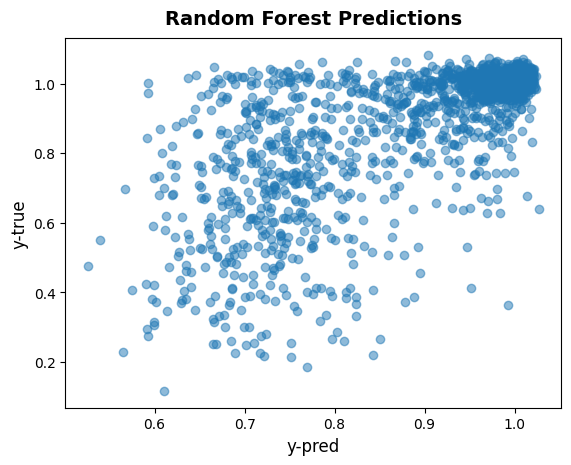

In [104]:
# use Random Forests instead of Linear Regression
A = smf_filter.merge(yeast_emb_best, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=46)

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Random Forest Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

R2: 0.301948298545336
RMSE: 0.14836189563597993


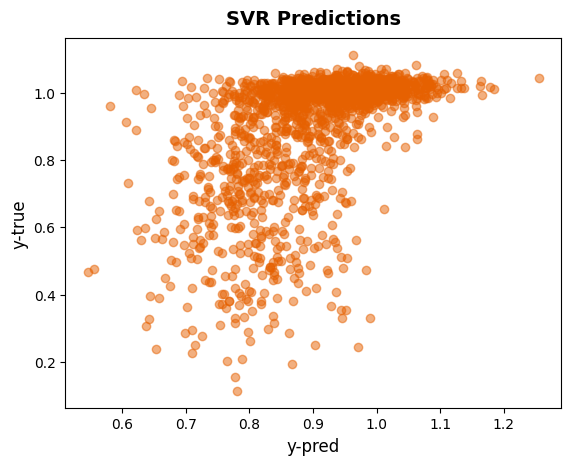

In [105]:
# use Support Vectors instead of Linear Regression
A = smf_filter.merge(yeast_emb_best, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47)

# Train an SVR model
svr = SVR(kernel='rbf', C=2.0, epsilon=0.1)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='#E66101')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("SVR Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

R2: 0.46843533267148496
RMSE: 0.13746720351529523


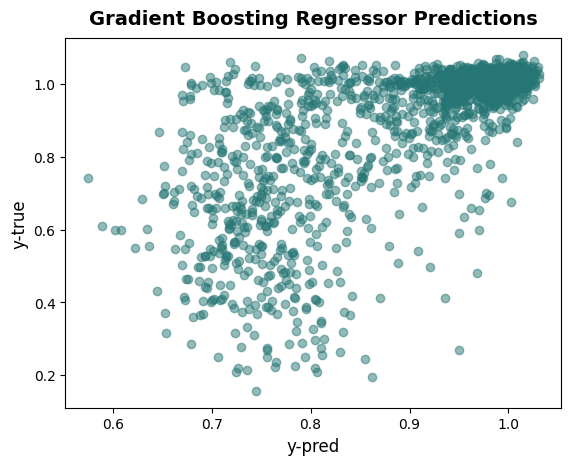

In [106]:
## use Gradient Boosting Regression instead of Linear Regression
A = smf_filter.merge(yeast_emb_best, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=48)

gb = GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=48)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='#267675')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Gradient Boosting Regressor Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1694 - mse: 0.1694 - val_loss: 0.0314 - val_mse: 0.0314
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0242 - mse: 0.0242 - val_loss: 0.0255 - val_mse: 0.0255
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0247 - val_mse: 0.0247
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0299 - val_mse: 0.0299
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189 - mse: 0.0189 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0167 - mse: 0.0167 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0179 - mse: 0.0179 - val_loss: 0.0243 - val_mse: 0.0243
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0250 - val_mse: 0.0250
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0155 - mse: 

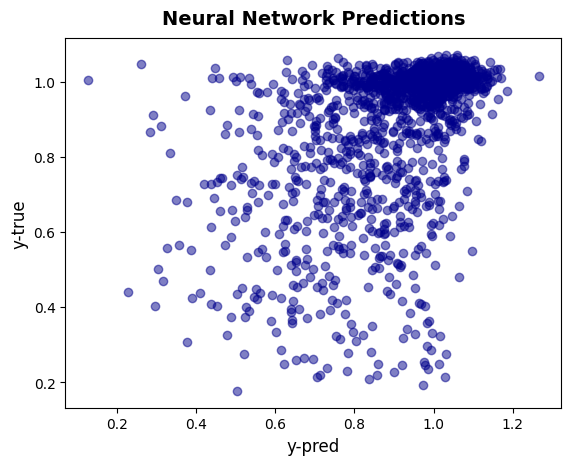

In [134]:
# Use Basic Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

A = smf_filter.merge(yeast_emb_best, on='gene_id', how='inner').dropna()
X = A.iloc[:, 5:]
y = A['smf_30']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=49)

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Neural Network Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()